In [50]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
#Loading the data set
df = pd.read_csv('electricity_bill_dataset.csv')
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [52]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [54]:
# Data preparation
## Data Cleaning
# Checking missing values
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [55]:
# Checking duplicates
df.duplicated().sum()

0

In [56]:
# Converting electricitybill data type to float for uniformity
df['ElectricityBill'] = df['ElectricityBill'].astype(float)
df['ElectricityBill']

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [57]:
# Feature Engineering
# Method to categorize seasons
def categorize_seasons(Month):
    if Month in [3, 4, 5]:
        return "Summer"
    elif Month in [6, 7, 8, 9]:
        return  "Monsoon"
    else:
        return  "Winter"

    
df['season'] = df['Month'].apply(categorize_seasons)

df.head()


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter


In [58]:
# MonthlyCostPerHour
df['MonthlyCostPerHour'] = df['ElectricityBill'] / df['MonthlyHours']
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season,MonthlyCostPerHour
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter,8.4
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer,7.8
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon,7.7
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon,9.2
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter,9.2


In [59]:
# Tariff Efficiency
df['TariffEfficiency'] = df['ElectricityBill'] / df['TariffRate']
df.head()


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season,MonthlyCostPerHour,TariffEfficiency
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter,8.4,384.0
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer,7.8,488.0
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon,7.7,416.0
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon,9.2,475.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter,9.2,457.0


In [60]:
# Total Appliance Usage
df['TotalApplianceHours'] = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].sum(axis=1)
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,season,MonthlyCostPerHour,TariffEfficiency,TotalApplianceHours
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,Winter,8.4,384.0,48.0
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4,Summer,7.8,488.0,47.0
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2,Monsoon,7.7,416.0,42.0
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,Monsoon,9.2,475.0,54.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,Winter,9.2,457.0,48.0


In [61]:
# Percentage Contribution of Each Appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
for appliance in appliances:
    df[f'{appliance}_Contribution'] = (df[appliance] / df['TotalApplianceHours']) * 100
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,...,season,MonthlyCostPerHour,TariffEfficiency,TotalApplianceHours,Fan_Contribution,Refrigerator_Contribution,AirConditioner_Contribution,Television_Contribution,Monitor_Contribution,MotorPump_Contribution
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,...,Winter,8.4,384.0,48.0,33.333333,47.916667,4.166667,12.500000,2.083333,0.0
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,...,Summer,7.8,488.0,47.0,40.425532,46.808511,4.255319,6.382979,2.127660,0.0
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,...,Monsoon,7.7,416.0,42.0,16.666667,47.619048,4.761905,14.285714,16.666667,0.0
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,...,Monsoon,9.2,475.0,54.0,12.962963,40.740741,5.555556,38.888889,1.851852,0.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,...,Winter,9.2,457.0,48.0,22.916667,47.916667,4.166667,22.916667,2.083333,0.0


In [63]:
# Usage Category
def categorize_usage(bill):
    if bill < 2500:
        return 'Low'
    elif  2501 <= bill <= 5000 :
        return 'Medium'
    else:
        return 'High'

df['UsageCategory'] = df['ElectricityBill'].apply(categorize_usage)
df.head(15)

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,...,MonthlyCostPerHour,TariffEfficiency,TotalApplianceHours,Fan_Contribution,Refrigerator_Contribution,AirConditioner_Contribution,Television_Contribution,Monitor_Contribution,MotorPump_Contribution,UsageCategory
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,...,8.4,384.0,48.0,33.333333,47.916667,4.166667,12.500000,2.083333,0.0,Medium
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,...,7.8,488.0,47.0,40.425532,46.808511,4.255319,6.382979,2.127660,0.0,Medium
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,...,7.7,416.0,42.0,16.666667,47.619048,4.761905,14.285714,16.666667,0.0,Medium
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,...,9.2,475.0,54.0,12.962963,40.740741,5.555556,38.888889,1.851852,0.0,Medium
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,...,9.2,457.0,48.0,22.916667,47.916667,4.166667,22.916667,2.083333,0.0,Medium
5,13,22.0,0.0,18.0,1.0,0,6,Ratnagiri,Adani Power Ltd.,471,...,7.4,471.0,54.0,24.074074,40.740741,0.000000,33.333333,1.851852,0.0,Medium
6,23,22.0,3.0,20.0,12.0,0,5,New Delhi,Kalpataru Power,755,...,8.5,755.0,80.0,28.750000,27.500000,3.750000,25.000000,15.000000,0.0,High
7,22,23.0,0.0,21.0,1.0,0,12,New Delhi,Adani Power Ltd.,492,...,8.5,492.0,67.0,32.835821,34.328358,0.000000,31.343284,1.492537,0.0,Medium
8,8,20.0,2.0,8.0,1.0,0,8,New Delhi,Orient Green,546,...,8.5,546.0,39.0,20.512821,51.282051,5.128205,20.512821,2.564103,0.0,Medium
9,10,23.0,0.0,18.0,7.0,0,1,Dahej,Sterlite Power Transmission Ltd,578,...,7.6,578.0,58.0,17.241379,39.655172,0.000000,31.034483,12.068966,0.0,Medium


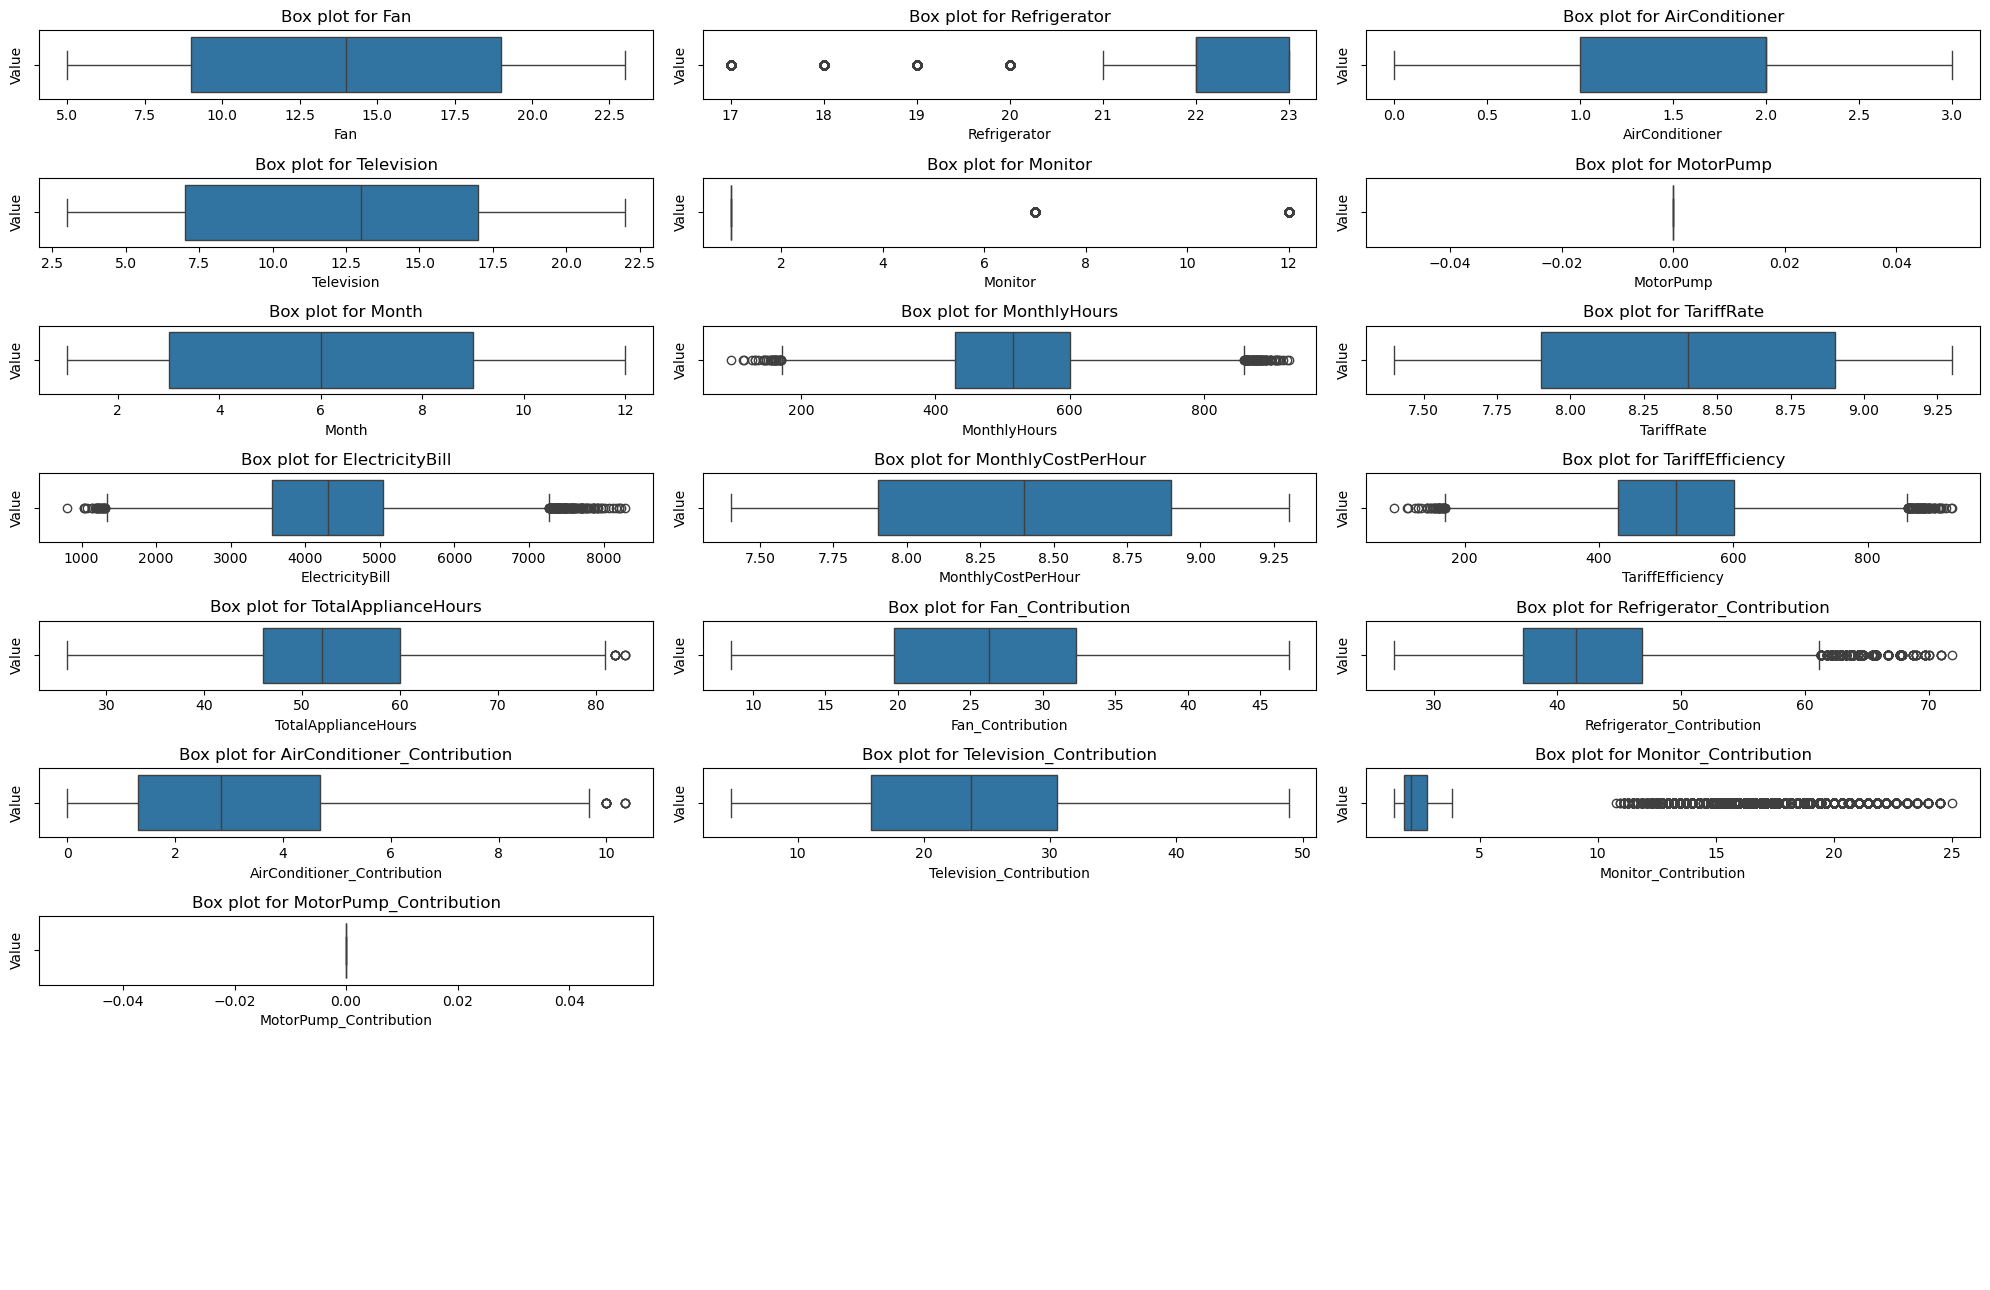

In [65]:
# Checking for outliers
#Only select numeric columns 
numeric_columns = df.select_dtypes(include=['float','integer']).columns[:]

# Grid layout
rows, cols = 9, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [66]:
# Dropping outliers
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['float','integer'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.20)  # .20
q3 = numeric_data.quantile(0.80)  # .80
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 45345
Number of rows after removing outliers: 34654
Number of rows removed: 10691



Average Consumption per Appliance (kWh):
        Appliance  Average Consumption (kWh)
1    Refrigerator                  21.928205
0             Fan                  14.305188
3      Television                  12.525105
2  AirConditioner                   1.513909
4         Monitor                   1.000000
5       MotorPump                   0.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37648\860222075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')


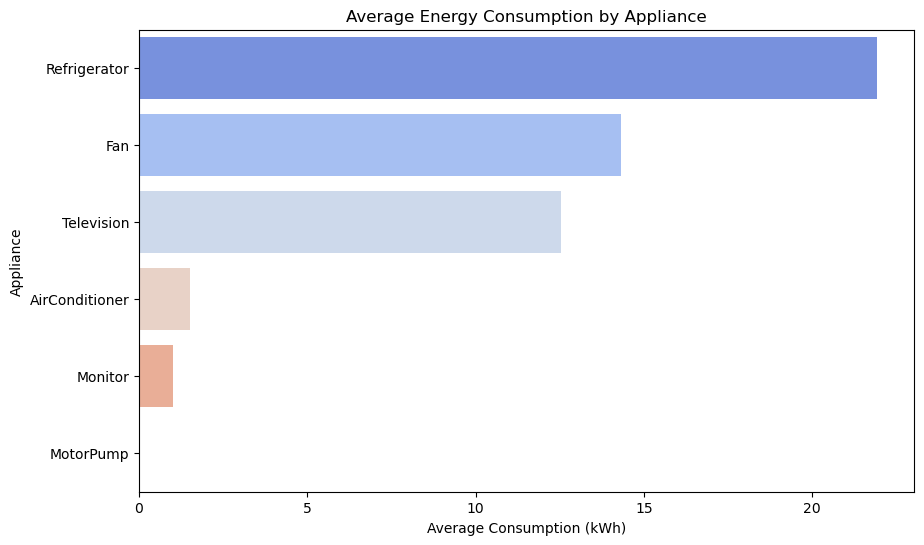

In [88]:

# --------- Objective 1: Appliance-Specific Energy Consumption ---------

# Calculate total consumption for each appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
appliance_consumption = df[appliances].mean().reset_index()
appliance_consumption.columns = ['Appliance', 'Average Consumption (kWh)']

# Sort appliances by average consumption
appliance_consumption = appliance_consumption.sort_values('Average Consumption (kWh)', ascending=False)
print("\nAverage Consumption per Appliance (kWh):")
print(appliance_consumption)

# Plot appliance-specific consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')
plt.title('Average Energy Consumption by Appliance')
plt.xlabel('Average Consumption (kWh)')
plt.ylabel('Appliance')
plt.show()




Monthly Electricity Usage Trends:
    Month  ElectricityBill        Fan  Refrigerator  AirConditioner
0       1      4308.876709  14.338424     21.919125        1.502950
1       2      3831.561739  14.245913     21.922783        1.517913
2       3      4333.636459  14.344546     21.917431        1.529392
3       4      4177.856891  14.369806     21.964681        1.515928
4       5      4290.081589  14.377794     21.914154        1.473217
5       6      4135.277266  14.295330     21.954327        1.508929
6       7      4349.890323  14.440042     21.960028        1.505259
7       8      4310.891125  14.181911     21.937669        1.534553
8       9      4146.695658  14.102303     21.895066        1.524342
9      10      4320.486474  14.296188     21.903959        1.524560
10     11      4156.563990  14.275709     21.916297        1.517595
11     12      4325.006415  14.412055     21.933380        1.510398


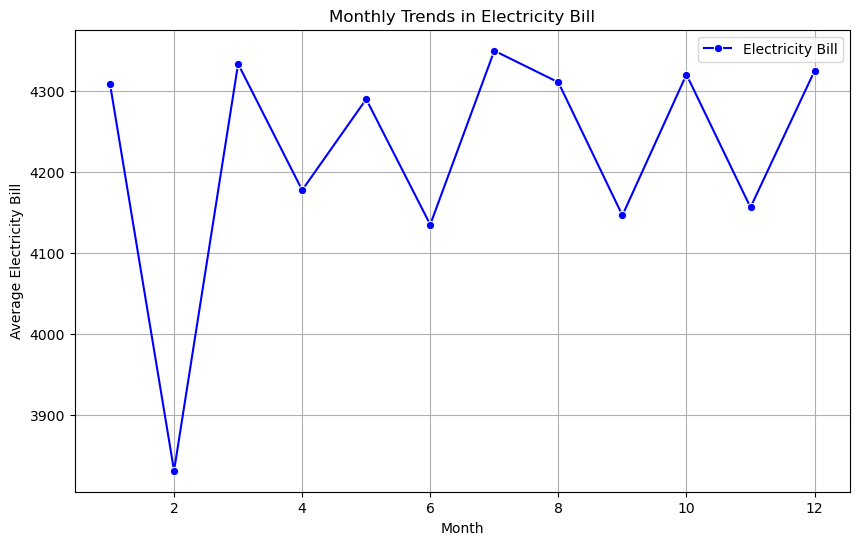

In [89]:
# --------- Objective 2: Monthly Electricity Usage Trends ---------

# Calculate average consumption and electricity bill by month
monthly_trends = df.groupby('Month')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
print("\nMonthly Electricity Usage Trends:")
print(monthly_trends)

# Plot total electricity bill over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='Month', y='ElectricityBill', marker='o', color='blue', label='Electricity Bill')
plt.title('Monthly Trends in Electricity Bill')
plt.xlabel('Month')
plt.ylabel('Average Electricity Bill')
plt.grid()
plt.legend()
plt.show()


City-Wise Electricity Usage and Billing:
           City  ElectricityBill        Fan  Refrigerator  AirConditioner
7        Mumbai      4680.156273  14.418358     21.933579        1.527214
9   Navi Mumbai      4673.726280  14.222372     21.880503        1.486523
12         Pune      4603.194137  14.501163     21.898092        1.494183
8        Nagpur      4510.086442  14.422160     21.972417        1.562412
1       Chennai      4454.878578  14.339102     21.949953        1.507951
6       Kolkata      4416.534247  14.269721     21.964100        1.502126
10    New Delhi      4296.993409  14.330455     21.913182        1.540909
5     Hyderabad      4213.700754  14.051441     21.938803        1.536142
4       Gurgaon      4203.189982  14.425657     21.957842        1.522665
11        Noida      4110.962628  14.328518     21.946878        1.486952
3     Faridabad      4082.198507  14.346902     21.924469        1.529625
0     Ahmedabad      3957.286049  14.292603     21.902154        1.468

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37648\1657182755.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')


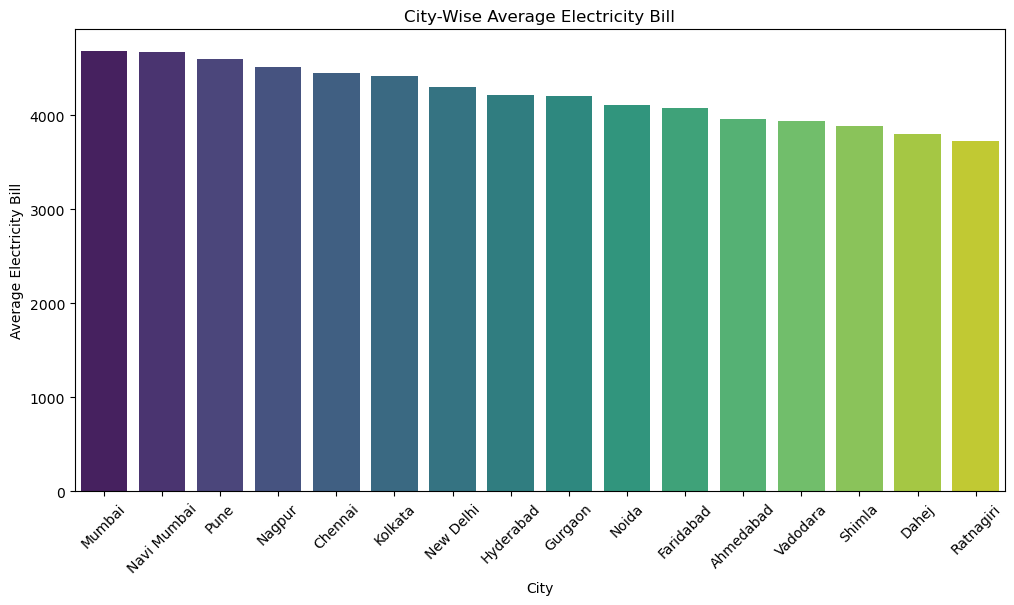

In [90]:
# --------- Objective 3: City-Wise Electricity Usage ---------

# Calculate average electricity consumption and bill by city
city_analysis = df.groupby('City')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
city_analysis = city_analysis.sort_values('ElectricityBill', ascending=False)
print("\nCity-Wise Electricity Usage and Billing:")
print(city_analysis)

# Plot city-wise electricity bills
plt.figure(figsize=(12, 6))
sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')
plt.title('City-Wise Average Electricity Bill')
plt.xlabel('City')
plt.ylabel('Average Electricity Bill')
plt.xticks(rotation=45)
plt.show()


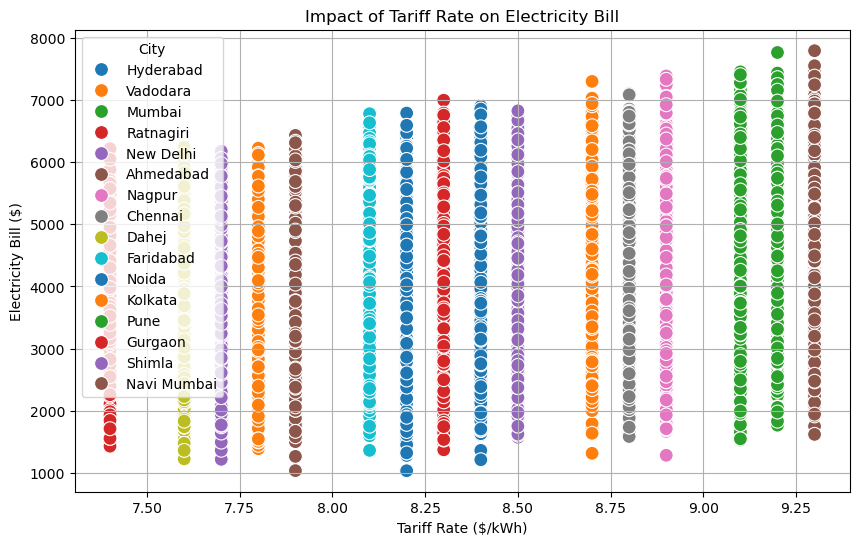


Correlation between Tariff Rate and Electricity Bill: 0.30


In [91]:
# --------- Objective 4: Impact of Tariff Rates ---------

# Analyze the relationship between TariffRate and ElectricityBill
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TariffRate', y='ElectricityBill', hue='City', palette='tab10', s=100)
plt.title('Impact of Tariff Rate on Electricity Bill')
plt.xlabel('Tariff Rate ($/kWh)')
plt.ylabel('Electricity Bill ($)')
plt.grid()
plt.show()

# Correlation between TariffRate and ElectricityBill
correlation = df[['TariffRate', 'ElectricityBill']].corr().iloc[0, 1]
print(f"\nCorrelation between Tariff Rate and Electricity Bill: {correlation:.2f}")


cities like ratnagiri, shimla, dahej and vadodara have lower tariff rate hence low electricity bill. 
It advisable for companies that have high power consumption to consider the ratnagiri, shimla, dahej and vadodara as their manufacturing site due to the lower tariff rate.
It also recommended for with low wages to consider those cities.
For cities like Navi Mumbai, Mumbai and Pune should consider other sources of electricity like solar, geothermal and wind turbines inorder to substitute so as to lower their electricity bills despite the higher tariff rates.

In [93]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory',
       'TotalConsumption'],
      dtype='object')


Proportion of Total Electricity Consumption by Appliance:
        Appliance  Total Consumption (kWh)  Proportion (%)
1    Refrigerator                 759900.0       42.768042
0             Fan                 495732.0       27.900364
3      Television                 434045.0       24.428549
2  AirConditioner                  52463.0        2.952678
4         Monitor                  34654.0        1.950367
5       MotorPump                      0.0        0.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37648\3553329814.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')


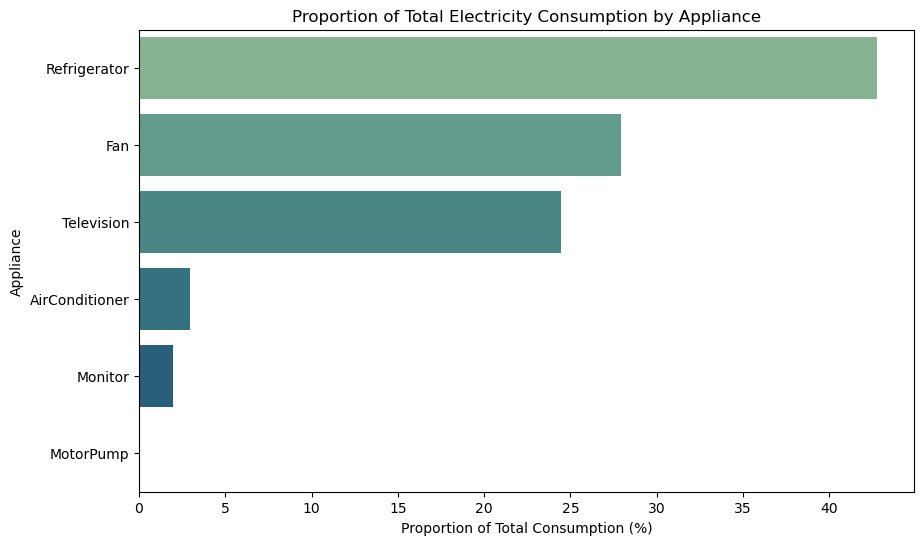

In [92]:
# --------- Objective 5: Total Energy Efficiency ---------

# Calculate the proportion of total electricity consumption by each appliance
df['TotalConsumption'] = df[appliances].sum(axis=1)
appliance_efficiency = df[appliances].sum().reset_index()
appliance_efficiency.columns = ['Appliance', 'Total Consumption (kWh)']
appliance_efficiency['Proportion (%)'] = (appliance_efficiency['Total Consumption (kWh)'] / appliance_efficiency['Total Consumption (kWh)'].sum()) * 100

# Sort by proportion of consumption
appliance_efficiency = appliance_efficiency.sort_values('Proportion (%)', ascending=False)
print("\nProportion of Total Electricity Consumption by Appliance:")
print(appliance_efficiency)

# Plot energy efficiency by appliance
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')
plt.title('Proportion of Total Electricity Consumption by Appliance')
plt.xlabel('Proportion of Total Consumption (%)')
plt.ylabel('Appliance')
plt.show()

The refrigerator has highest electricity consumption rate followed by the fan and television.
Companies that want to venture into electric equipments like refrigerator, fan and television should make energy saving equipments that give them a competitive edge over current market.

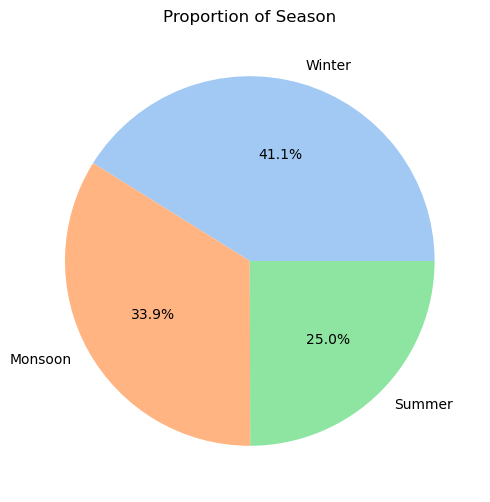

In [70]:
# seasonal pie chart distribution
    # Pie chart
plt.figure(figsize=(6, 6))
df['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Season')
plt.ylabel('')
plt.show()

It is noted that during winter there is higher elecricity consumption compared to other seasons.


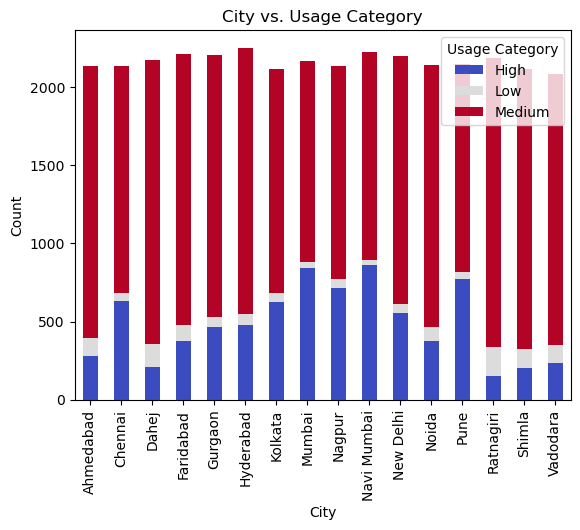

In [80]:
# Stacked bar chart example
pd.crosstab(df['City'], df['UsageCategory']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('City vs. Usage Category')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Usage Category')
plt.show()



Seasonal Analysis Results:
    season  ElectricityBill  TariffEfficiency  MonthlyCostPerHour  \
0  Monsoon      4234.392651        505.460020            8.374388   
1   Summer      4267.431538        509.838844            8.369908   
2   Winter      4186.707391        500.275477            8.367883   

   Fan_Contribution  Refrigerator_Contribution  AirConditioner_Contribution  \
0         27.312130                  43.885647                     3.006244   
1         27.429598                  43.742722                     2.986312   
2         27.375267                  43.776122                     2.990558   

   Television_Contribution  Monitor_Contribution  MotorPump_Contribution  
0                23.783189              2.012790                     0.0  
1                23.834849              2.006519                     0.0  
2                23.848986              2.009067                     0.0  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37648\33056813.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')


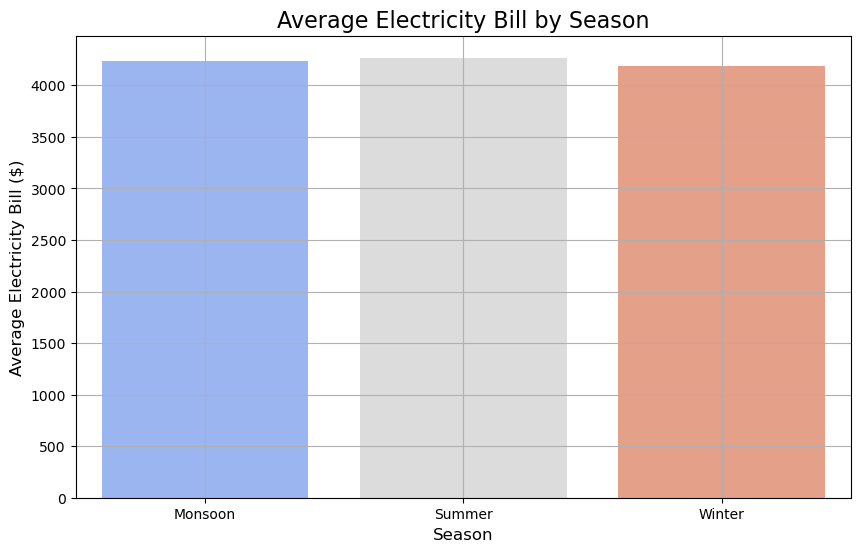

In [94]:
# --------- Step 1: Seasonal Analysis ---------

# Group by season and calculate average electricity bill, tariff efficiency, and appliance contributions
seasonal_analysis = df.groupby('season')[
    ['ElectricityBill', 'TariffEfficiency', 'MonthlyCostPerHour'] + 
    ['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
     'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution']
].mean().reset_index()

print("\nSeasonal Analysis Results:")
print(seasonal_analysis)

# Plot seasonal electricity bills
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')
plt.title('Average Electricity Bill by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Electricity Bill ($)', fontsize=12)
plt.grid(True)
plt.show()



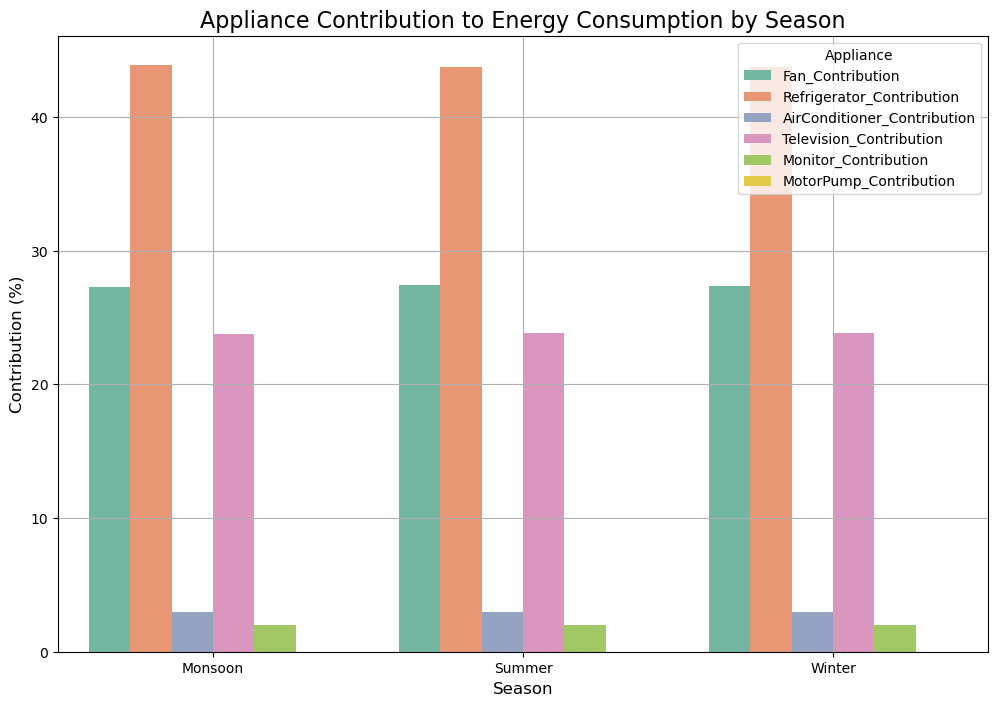

In [95]:
# Plot seasonal appliance contributions
appliance_contributions = seasonal_analysis.melt(
    id_vars='season', 
    value_vars=['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
                'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution'],
    var_name='Appliance',
    value_name='Contribution (%)'
)

plt.figure(figsize=(12, 8))
sns.barplot(data=appliance_contributions, x='season', y='Contribution (%)', hue='Appliance', palette='Set2')
plt.title('Appliance Contribution to Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend(title='Appliance', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()



Cost Efficiency by City and Season:
           City   season  MonthlyCostPerHour  TariffEfficiency
0     Ahmedabad  Monsoon                 7.9        501.458333
1     Ahmedabad   Summer                 7.9        508.566108
2     Ahmedabad   Winter                 7.9        495.813424
3       Chennai  Monsoon                 8.8        509.900133
4       Chennai   Summer                 8.8        510.621569
5       Chennai   Winter                 8.8        500.548461
6         Dahej  Monsoon                 7.6        500.298898
7         Dahej   Summer                 7.6        499.625461
8         Dahej   Winter                 7.6        500.965859
9     Faridabad  Monsoon                 8.1        506.414248
10    Faridabad   Summer                 8.1        507.089286
11    Faridabad   Winter                 8.1        500.373024
12      Gurgaon  Monsoon                 8.3        505.416557
13      Gurgaon   Summer                 8.3        519.785199
14      Gurgaon   

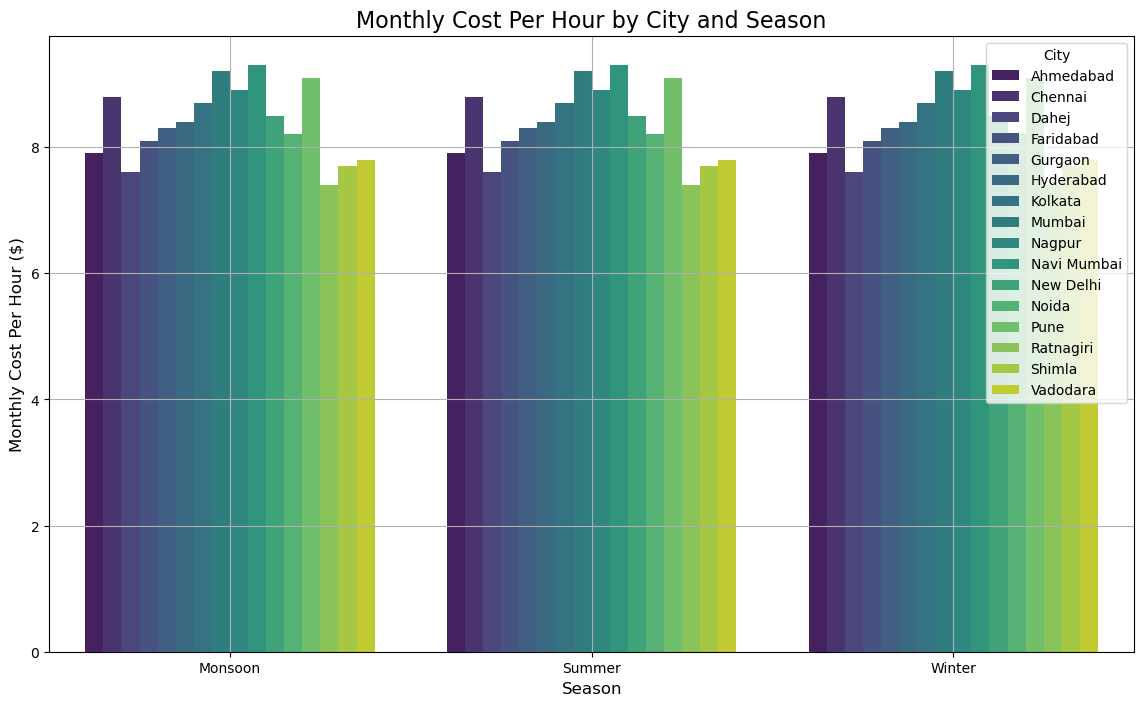

In [96]:
# --------- Step 2: Cost Efficiency by Season and City ---------

# Group by city and season to calculate cost efficiency
city_season_analysis = df.groupby(['City', 'season'])[['MonthlyCostPerHour', 'TariffEfficiency']].mean().reset_index()
print("\nCost Efficiency by City and Season:")
print(city_season_analysis)

# Plot cost efficiency by season for top cities
plt.figure(figsize=(14, 8))
sns.barplot(data=city_season_analysis, x='season', y='MonthlyCostPerHour', hue='City', palette='viridis')
plt.title('Monthly Cost Per Hour by City and Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Monthly Cost Per Hour ($)', fontsize=12)
plt.legend(title='City', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


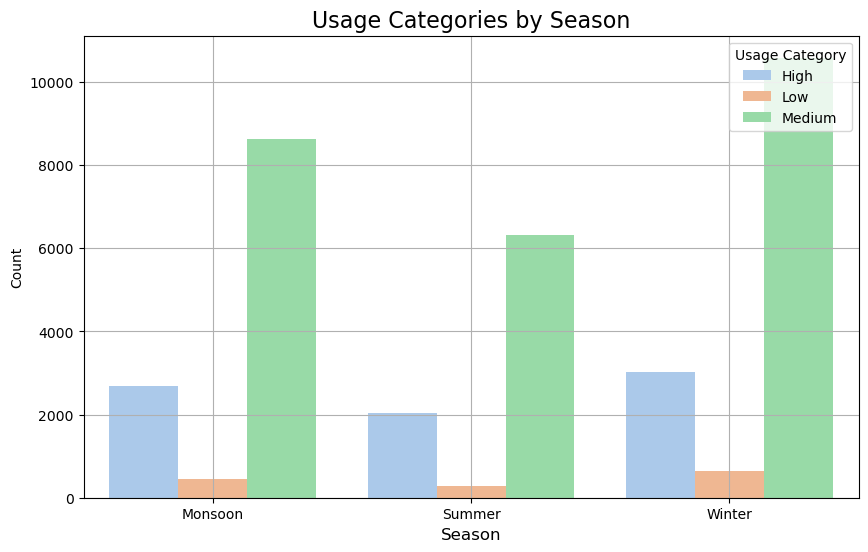

In [97]:
# --------- Step 3: UsageCategory Trends ---------

# Count the number of occurrences of each usage category by season
usage_category_analysis = df.groupby(['season', 'UsageCategory']).size().reset_index(name='Count')

# Plot usage categories by season
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_category_analysis, x='season', y='Count', hue='UsageCategory', palette='pastel')
plt.title('Usage Categories by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count')
plt.legend(title='Usage Category', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


Seasonal Appliance Usage and Total Consumption:
    season  TotalApplianceHours  TotalConsumption
0  Monsoon            51.196580         51.196580
1   Summer            51.354682         51.354682
2   Winter            51.285022         51.285022


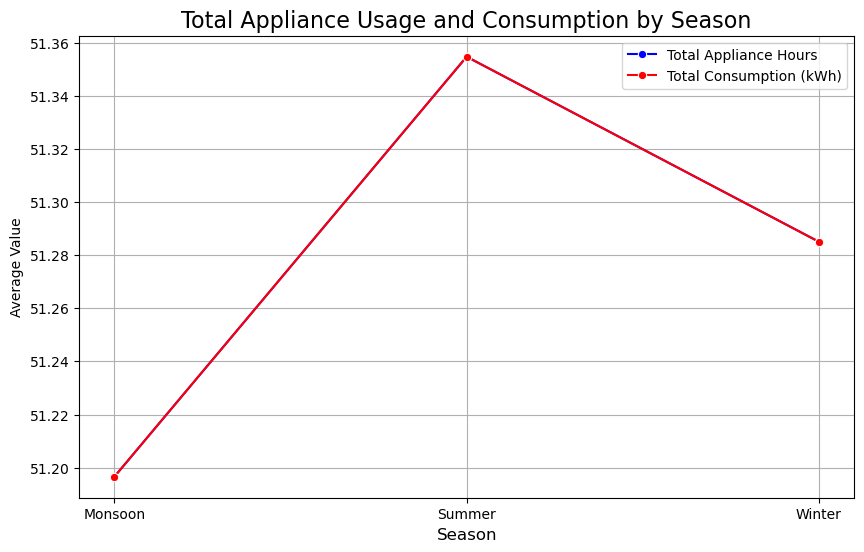

In [98]:
# --------- Step 4: Appliance Usage Patterns ---------

# Calculate average TotalApplianceHours and TotalConsumption by season
season_usage_analysis = df.groupby('season')[['TotalApplianceHours', 'TotalConsumption']].mean().reset_index()
print("\nSeasonal Appliance Usage and Total Consumption:")
print(season_usage_analysis)

# Plot TotalApplianceHours and TotalConsumption by season
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_usage_analysis, x='season', y='TotalApplianceHours', marker='o', label='Total Appliance Hours', color='blue')
sns.lineplot(data=season_usage_analysis, x='season', y='TotalConsumption', marker='o', label='Total Consumption (kWh)', color='red')
plt.title('Total Appliance Usage and Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Value')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


gradient boosting model

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define features and target
X = df.drop("ElectricityBill",axis=1)
y = df["ElectricityBill"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


ValueError: could not convert string to float: 'Mumbai'